## **Importing libraries:**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## **Importing dataset:**

In [29]:
file_path = 'data/framingham.csv'

try:
    df = pd.read_csv(file_path)
    print("Loaded!\n")
    print(df.head())

except:
  print(f"Error: File not found in'{file_path}'")

Loaded!

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1        

## **Getting to know the dataset:**

In [30]:
X = df.iloc[0:, 0:15]
print(f"{X[:5]}, \n") 
print({X.shape}, {type(X)})

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0  
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0  
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0  
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0  , 

{(4238, 15)} {<class 'pandas.core.frame.DataFrame'>}


In [31]:
y = df.iloc[0:, 15]
print(y[:5])
print({y.shape}, {type(y)})

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64
{(4238,)} {<class 'pandas.core.series.Series'>}


## **Transforming the data into an array**


In [32]:
X = np.array(X)
print(f'X = {X.shape}, {type(X)}\n\n', X[:5], end='\n\n')
y = np.array(y)
print(f'y = {y.shape}, {type(y)}\n\n', y[:5], end='\n\n')
print (f'Temos m = {len(y)} exemplos')
print (f'Temos n = {X.shape[1]} features')

X = (4238, 15), <class 'numpy.ndarray'>

 [[  1.    39.     4.     0.     0.     0.     0.     0.     0.   195.
  106.    70.    26.97  80.    77.  ]
 [  0.    46.     2.     0.     0.     0.     0.     0.     0.   250.
  121.    81.    28.73  95.    76.  ]
 [  1.    48.     1.     1.    20.     0.     0.     0.     0.   245.
  127.5   80.    25.34  75.    70.  ]
 [  0.    61.     3.     1.    30.     0.     0.     1.     0.   225.
  150.    95.    28.58  65.   103.  ]
 [  0.    46.     3.     1.    23.     0.     0.     0.     0.   285.
  130.    84.    23.1   85.    85.  ]]

y = (4238,), <class 'numpy.ndarray'>

 [0 0 0 1 0]

Temos m = 4238 exemplos
Temos n = 15 features


## **Dividing the data:**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train = {X_train.shape}, {type(X_train)}')
print(f'X_test = {X_test.shape}, {type(X_test)}\n')

print(f'y_train = {y_train.shape}, {type(y_train)}')
print(f'y_test = {y_test.shape}, {type(y_test)}')

X_train = (3390, 15), <class 'numpy.ndarray'>
X_test = (848, 15), <class 'numpy.ndarray'>

y_train = (3390,), <class 'numpy.ndarray'>
y_test = (848,), <class 'numpy.ndarray'>


## **Processing the data:**

In [34]:
# Filling in the data:

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

X_train_preenchido = imputer.transform(X_train)
X_test_preenchido = imputer.transform(X_test)

# Normalizing the data:

scaler = StandardScaler()
scaler.fit(X_train_preenchido)

X_train_scaled = scaler.transform(X_train_preenchido)
X_test_scaled = scaler.transform(X_test_preenchido)

print(X_train_scaled[:2], end='\n\n')
print(scaler.mean_, end='\n\n')
print(scaler.scale_)


[[ 1.16861732 -1.11033368  2.02698488  1.00177148  1.7625848  -0.17597086
  -0.07895127 -0.67541511 -0.16037022 -0.71669873 -0.06284123 -0.16592129
  -0.51101793 -0.83779855  0.22111189]
 [-0.85571212  0.87196279  0.02993757 -0.99823165 -0.76243064 -0.17597086
  -0.07895127  1.48057097 -0.16037022  0.2950591   0.90928719  0.79521416
   1.57584071 -0.08344597  0.53060818]]

[4.22713864e-01 4.95221239e+01 1.97001817e+00 4.99115044e-01
 9.05852644e+00 2.96229803e-02 6.19469027e-03 3.13274336e-01
 2.50737463e-02 2.36876643e+02 1.32389823e+02 8.29852507e+01
 2.58385723e+01 7.59955739e+01 8.19990247e+01]

[ 0.49399074  8.57591195  1.00147852  0.49999922 11.88111551  0.16834026
  0.0784622   0.46382489  0.15634914 44.47704673 22.11641963 11.96501491
  4.10665094 11.93076059 22.61739611]


## **Defining the SIGMOID function:**

In [35]:
def sigmoid(z):

 # Calculate the sigmoid of z


  g = 1 / (1 + np.exp(-z))

  return g



## **Testing Sigmoid. Sigmoid of 0 == 0.5**

In [36]:
value = 0

sigmoid_0 = sigmoid(value)

print(f'Sigmoid de 0 = {sigmoid_0}', end='\n\n')

teste = np.array([-1, 0 , 1.5, 2])
sigmoid_1 = sigmoid(teste)
print(sigmoid_1)

Sigmoid de 0 = 0.5

[0.26894142 0.5        0.81757448 0.88079708]


## **Calculating the Cost Function:**

In [37]:
def compute_cost(X, y, w, b, lambda_=0, *argv):
    m = len(y)
    # Calculates all the z values ​​at once (matrix product)
    z = np.dot(X, w) + b
    f_wb = sigmoid(z) # Apply sigmoid to everything at once

    # Avoids log(0) by adding a lowercase value (epsilon)
    epsilon = 1e-5
    loss = -y * np.log(f_wb + epsilon) - (1 - y) * np.log(1 - f_wb + epsilon)

    base_cost = np.sum(loss) / m
    
    reg_cost = 0
    if lambda_ > 0:
        reg_cost = (lambda_ / (2 * m) * np.sum(w ** 2)) 
    
    total_cost = base_cost + reg_cost

    return total_cost

## **Testing compute_cost:**

In [38]:
m,n = X_train_scaled.shape

initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train_scaled, y_train, initial_w, initial_b)

print(f'Cost with w and b(zeros): {cost:.3f}')

Cost with w and b(zeros): 0.693


In [39]:
m,n = X_train_scaled.shape

np.random.seed(42)

test_w = np.random.rand(n) * 0.01
test_b = -10
cost = compute_cost(X_train_scaled, y_train, test_w, test_b)

print(f'Cost with w and b: {cost:.3f}')

Cost with w and b: 1.501


## **Defining the gradient calculation:**

In [40]:
def compute_gradient(X, y, w, b, lambda_=0, *argv):

    m,n = X.shape

    dj_db = 0.
    dj_dw = np.zeros(w.shape)

    z = np.dot(X, w) + b

    f_wb = sigmoid(z)

    error = f_wb - y

    dj_dw = np.dot(X.T, error) / m
    dj_db = np.sum(error) / m

    if lambda_ > 0:
        dj_dw += (lambda_ / m) * w

    return dj_dw, dj_db


## **Testing compute_gradient:**

In [41]:
m,n = X_train_scaled.shape

initial_w = np.zeros(n)
initial_b = 0.
dj_dw, dj_db = compute_gradient(X_train_scaled, y_train, initial_w, initial_b)

print(f'Gradient dj_dw:\n {dj_dw}', end='\n\n')
print(f'Gradient dj_db: {dj_db}')

Gradient dj_dw:
 [-0.02817866 -0.08487433  0.01523095 -0.00558123 -0.02126835 -0.03310524
 -0.02172574 -0.0642963  -0.03200169 -0.02516983 -0.0801443  -0.05561124
 -0.02411449 -0.00379024 -0.04375033]

Gradient dj_db: 0.3466076696165192


In [42]:
np.random.seed(42)

test_w = np.random.rand(n) * 0.01
test_b = -10
dj_dw, dj_db = compute_gradient(X_train_scaled, y_train, test_w, test_b)

print(f'dj_dw: {dj_dw}\n\n')
print(f'dj_db: {dj_db:.3f}')

dj_dw: [-0.02817842 -0.08487364  0.01523107 -0.00558115 -0.0212682  -0.03310485
 -0.02172566 -0.06429533 -0.03200123 -0.02516922 -0.08014331 -0.05561024
 -0.02411376 -0.00378993 -0.04374993]


dj_db: -0.153


## **Implementing the gradient descent function:**

In [43]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):

    m = len(X)

    J_history = []
    w_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w_in, b_in, lambda_)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i < 100000:
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteraction {i:4}: Cost {float(J_history[-1]):8.5f}")

    return w_in, b_in, J_history, w_history



In [52]:
np.random.seed(42)

initial_w = np.random.rand(n) * 0.01
initial_b = 0.

iterations = 1000
alpha = 0.1

w, b, J_history,_ = gradient_descent(X_train_scaled, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations, 0)

Iteraction    0: Cost  0.67631
Iteraction  100: Cost  0.39500
Iteraction  200: Cost  0.38184
Iteraction  300: Cost  0.37969
Iteraction  400: Cost  0.37918
Iteraction  500: Cost  0.37903
Iteraction  600: Cost  0.37898
Iteraction  700: Cost  0.37895
Iteraction  800: Cost  0.37895
Iteraction  900: Cost  0.37894
Iteraction  999: Cost  0.37894


## **Calculating Accuracy and Interpreting the Results:**

In [53]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)

    predictions = (f_wb >= 0.15).astype(int)
    return predictions


p = predict(X_test_scaled, w, b)

accuracy = np.mean (p == y_test) * 100

print(f"Acurácia no test: {accuracy:.2F}")

Acurácia no test: 63.68


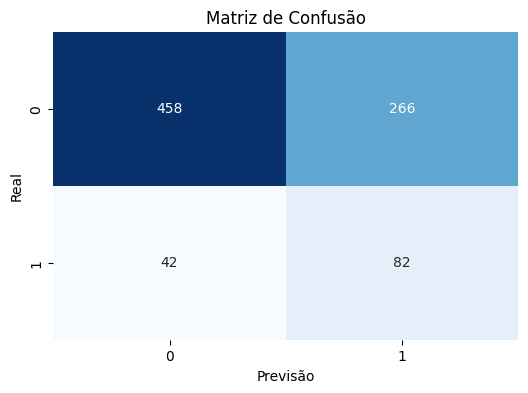

              precision    recall  f1-score   support

           0       0.92      0.63      0.75       724
           1       0.24      0.66      0.35       124

    accuracy                           0.64       848
   macro avg       0.58      0.65      0.55       848
weighted avg       0.82      0.64      0.69       848



In [54]:

cm = confusion_matrix(y_test, p)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print(classification_report(y_test,p))